In [2]:
# You are a data scientist working for a healthcare company, and you have been tasked with creating a
# decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
# given a dataset (diabetes.csv) with the following variables:
# 1. Pregnancies: Number of times pregnant (integer)
# 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
# 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
# 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
# 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
# 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
# 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
# based on family history) (float)
# 8. Age: Age in years (integer)
# 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

In [3]:
# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
# understand the distribution and relationships between the variables.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: xlabel='Outcome', ylabel='count'>

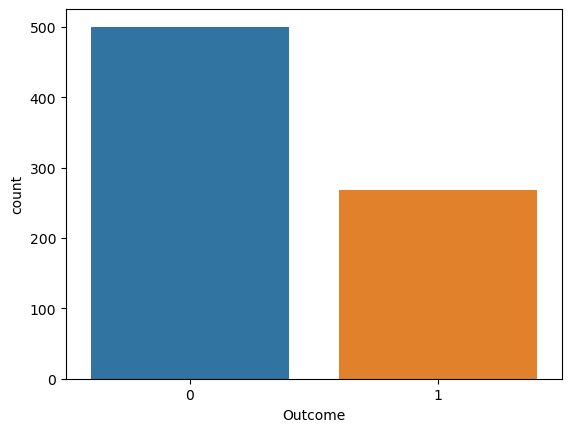

In [10]:
sns.countplot(data=data,x='Outcome')

<AxesSubplot: xlabel='Pregnancies', ylabel='Count'>

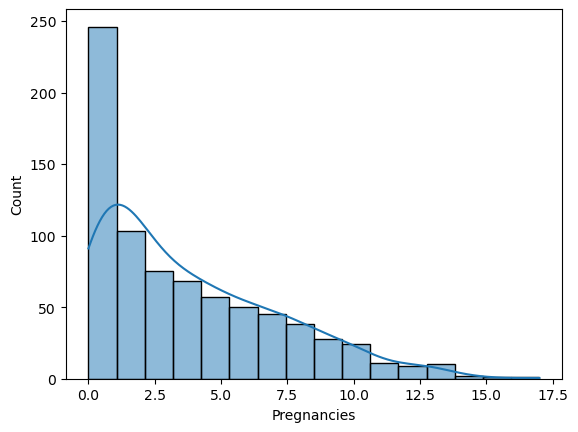

In [11]:
sns.histplot(data=data,x=data['Pregnancies'],kde=True)

In [12]:
numeric_col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

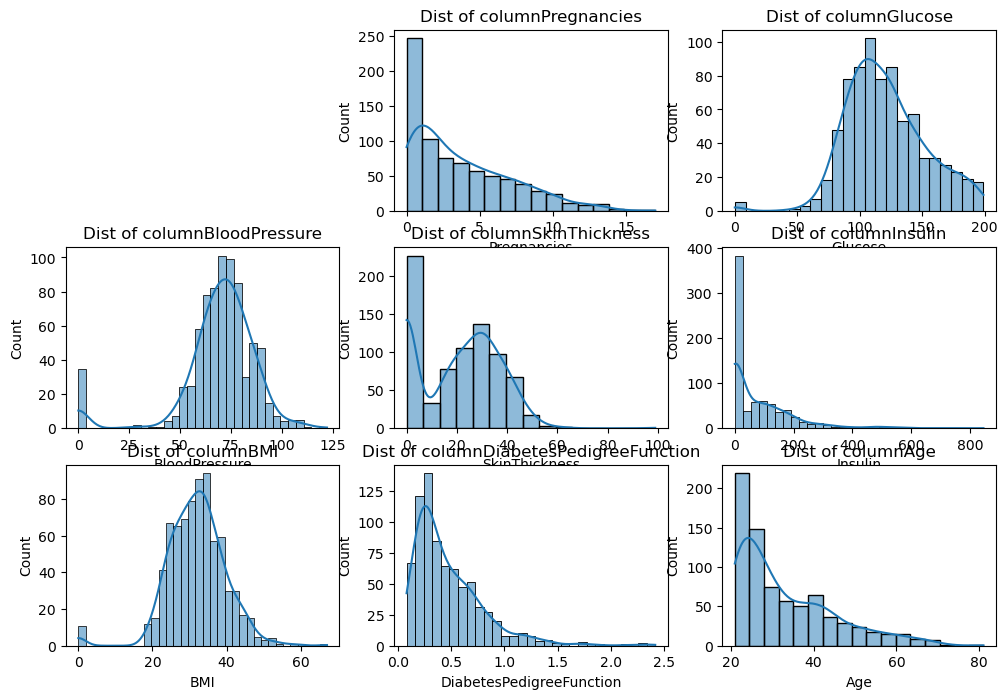

In [13]:
plt.figure(figsize=(12, 8))
for i,col in enumerate(numeric_col,start=2):
    plt.subplot(3,3,i)
    sns.histplot(data=data,x=data[col],kde=True)
    plt.title(f'Dist of column{col}')

In [14]:
# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
# variables into dummy variables if necessary.

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

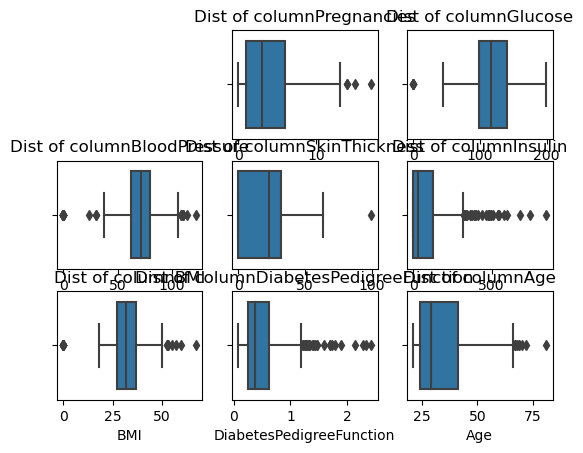

In [16]:
for i,col in enumerate(numeric_col,start=2):
    plt.subplot(3,3,i)
    sns.boxplot(x=data[col])
    plt.title(f'Dist of column{col}')

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=data.drop('Outcome',axis=1)

In [21]:
y=data['Outcome']

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [23]:
# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
# cross-validation to optimize the hyperparameters and avoid overfitting.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
decison_tree_model=DecisionTreeClassifier(random_state=42)

In [26]:
param_grid={'criterion':['gini', 'entropy', 'log_loss'],
           'max_depth':[5,10,15,20],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]}

In [27]:
grid=GridSearchCV(decison_tree_model,param_grid=param_grid,cv=6,scoring='accuracy')

In [28]:
grid.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [29]:
grid.score(X_test,y_test)

0.7165354330708661

In [30]:
# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
# precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [31]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [32]:
y_pred=grid.predict(X_test)

In [33]:
accuracy=accuracy_score(y_test,y_pred)

In [34]:
accuracy

0.7165354330708661

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
conf_matrix

array([[126,  42],
       [ 30,  56]])

In [37]:
y_probs = grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

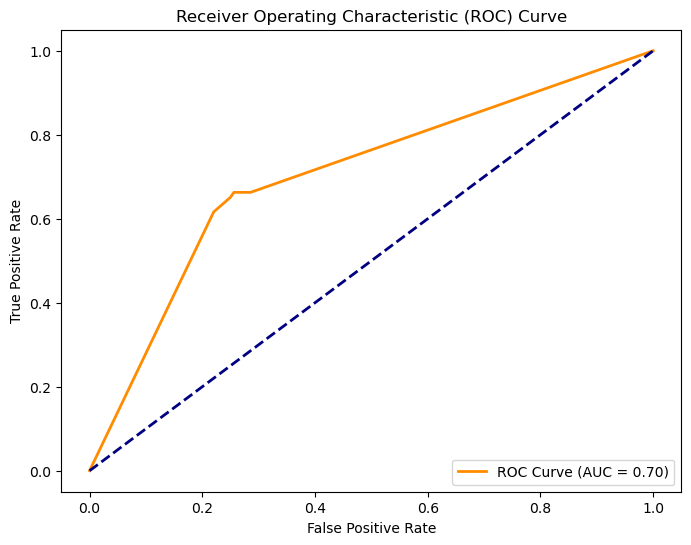

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [40]:
# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
# variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
# trends.

In [41]:
decision_cl=DecisionTreeClassifier()

In [42]:
decision_cl.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6148603723404256, 0.9615384615384616, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.3228058510638298, 0.8846153846153846, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.17952127659574468, 0.8076923076923077, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.1196808510638298, 0.7307692307692307, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.10904255319148937, 0.6538461538461539, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.09840425531914894, 0.5769230769230769, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.0425531914893617, 0.5, 'x[4] <= 156.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.02127659574468085, 0.4230769230769231, 'x[3] <= 41.0\ngini = 0.019\nsamples = 104\nvalue = [103, 1]'),
 Text(0.010638297872340425, 0.34615384615384615, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.031914893617021274

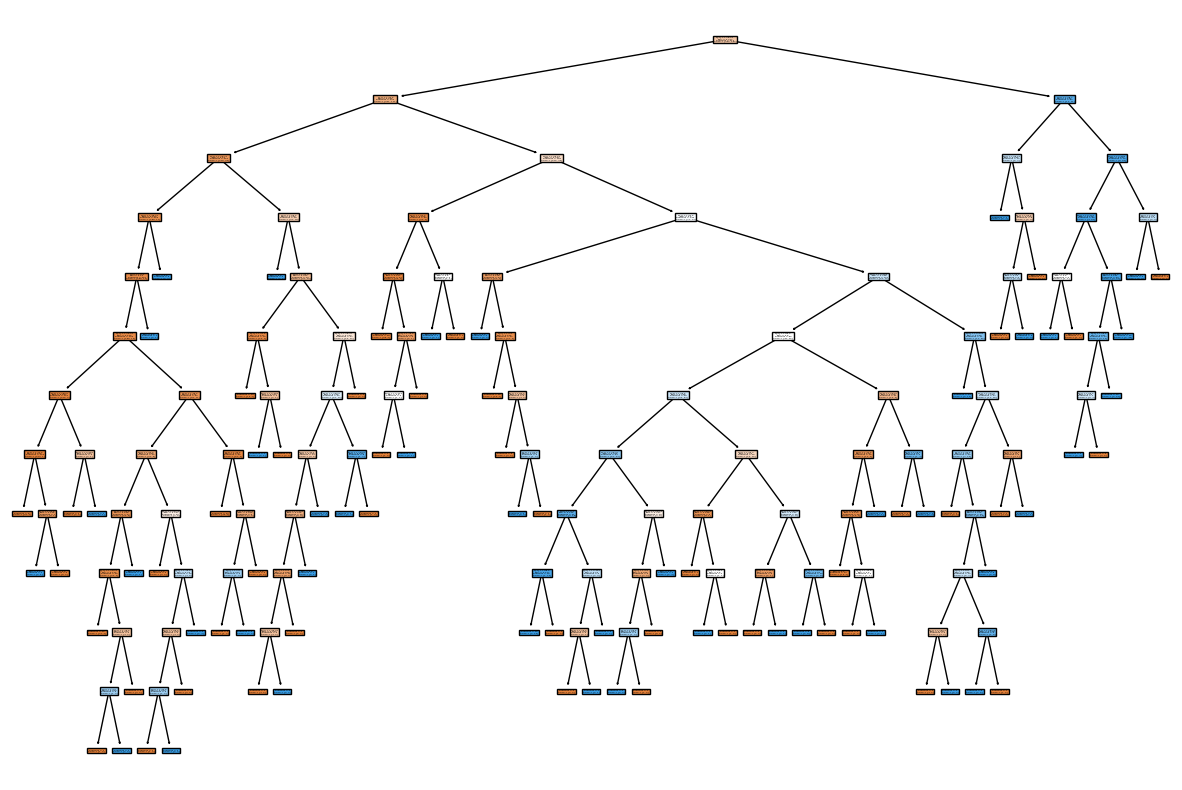

In [43]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_cl,filled=True)

In [44]:
decision_cl_N=DecisionTreeClassifier(max_depth=15)

In [45]:
decision_cl_N.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

[Text(0.6240857712765957, 0.9615384615384616, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.3412566489361702, 0.8846153846153846, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.19946808510638298, 0.8076923076923077, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.1276595744680851, 0.7307692307692307, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.11702127659574468, 0.6538461538461539, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.10638297872340426, 0.5769230769230769, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.0425531914893617, 0.5, 'x[4] <= 156.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.02127659574468085, 0.4230769230769231, 'x[3] <= 41.0\ngini = 0.019\nsamples = 104\nvalue = [103, 1]'),
 Text(0.010638297872340425, 0.34615384615384615, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.031914893617021274

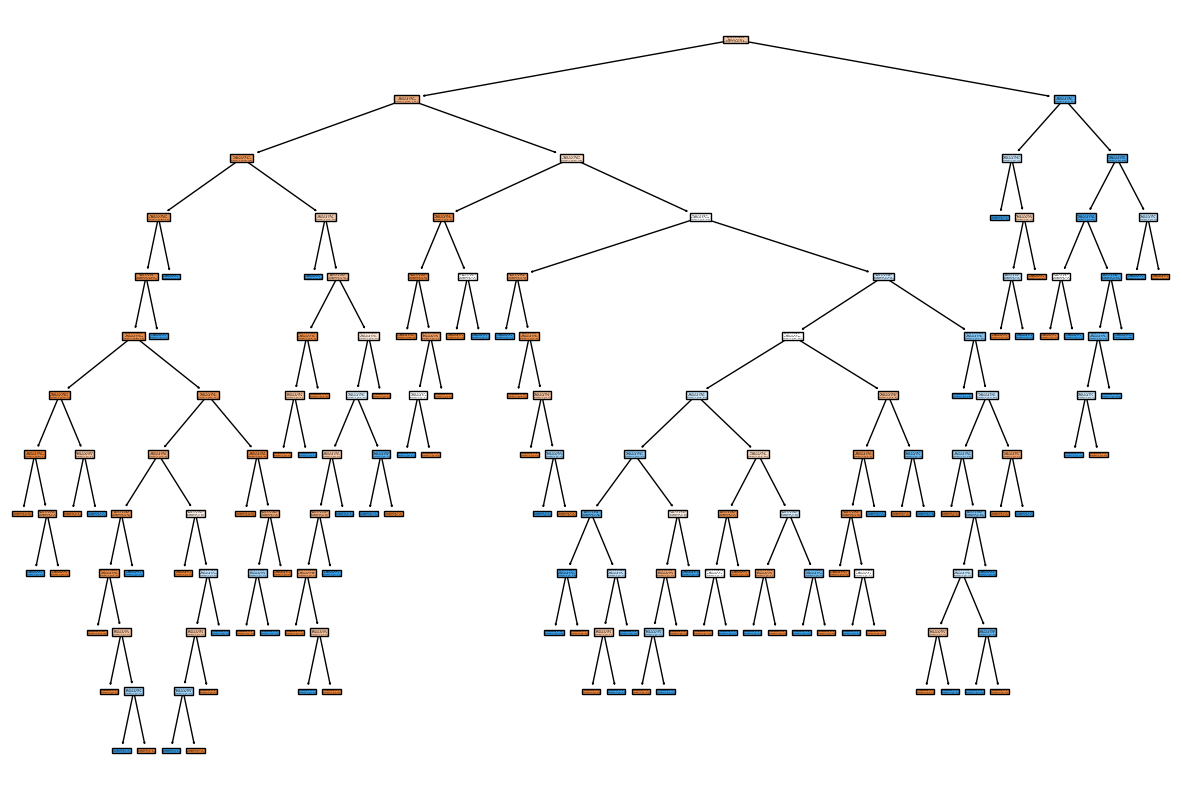

In [46]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_cl_N,filled=True)

In [1]:
# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
# dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
# risks.



In [47]:
sample_data_point=X_test.sample(n=1,random_state=42)

In [48]:
sample_data_point

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
6,3,78,50,32,88,31.0,0.248,26


In [49]:
original_prediction=decision_cl_N.predict(sample_data_point)

In [50]:
original_prediction

array([0])

In [51]:
perturbed_data_point = sample_data_point.copy()
perturbed_data_point['Glucose'] += 5  # Example: perturb the 'Glucose' feature by adding 5

# Display the prediction on the perturbed data
perturbed_prediction = decision_cl_N.predict(perturbed_data_point)
print("Prediction on Perturbed Data:", perturbed_prediction)

Prediction on Perturbed Data: [0]
